# Earthquake Data
Import Earthquake data plus shapefiles of States and Quaternary Faults  
Plot using Geopandas   
<u>Earthquake Data:<u>    
https://earthquake.usgs.gov/earthquakes/search  
https://catalog.data.gov/dataset/shapefiles-of-faults-for-the-united-states-canada-and-australia-92d23    

D.M. Advocate 12/15/2023  
Note: Geopandas was installed in a terminal window  
https://www.geeksforgeeks.org/how-to-install-geopandas-on-macos/    

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["figure.figsize"]=8,6  #10 x 8 is default figure size in Jupyter Notebook
plt.rcParams.update({'font.size': 12})

In [182]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #############################################
    print('Descriptive Statistics')
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('mode:   ','{: ,.4f}'.format(mode))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('count:  ','{: ,.4f}'.format(np.count_nonzero(var)))

## Read / Examine Data

In [3]:
df = pd.read_excel('/Users/davidadvocate/Documents/Python/Data/EarthquakeData.xlsx', sheet_name='EarthquakeData')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10000 non-null  object 
 1   latitude         10000 non-null  float64
 2   longitude        10000 non-null  float64
 3   depth            10000 non-null  float64
 4   mag              10000 non-null  float64
 5   magType          10000 non-null  object 
 6   nst              10000 non-null  int64  
 7   gap              10000 non-null  float64
 8   dmin             9976 non-null   float64
 9   rms              10000 non-null  float64
 10  net              10000 non-null  object 
 11  id               10000 non-null  object 
 12  updated          10000 non-null  object 
 13  place            9849 non-null   object 
 14  type             10000 non-null  object 
 15  horizontalError  8878 non-null   float64
 16  depthError       10000 non-null  float64
 17  magError     

In [183]:
my_stats(df['mag'])

Descriptive Statistics
mean:     1.0709
median:   1.0000
mode:     0.7575
sem:      0.0059
min:      0.1000
max:      4.8300
stdev:    0.5857
skew:     1.1281
kurt:     2.2085
p05:      0.2800
p95:      2.1800
count:    10,000.0000


In [6]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
9995,2023-09-24T09:21:08.800Z,38.818833,-122.761500,2.58,0.44,md,4,273.00,0.01335,0.0100,...,1.08,0.132,4.0,reviewed,nc,nc,NaN,NaN,NaN,NaN
9996,2023-09-24T09:15:16.610Z,38.797833,-122.767000,1.85,0.22,md,10,102.00,0.00634,0.0200,...,0.53,0.299,9.0,reviewed,nc,nc,NaN,NaN,NaN,NaN
9997,2023-09-24T09:09:59.130Z,39.270833,-123.326000,4.63,1.25,md,21,60.00,0.06781,0.0700,...,0.54,0.170,17.0,reviewed,nc,nc,NaN,NaN,NaN,NaN
9998,2023-09-24T08:55:35.779Z,39.405100,-120.218200,11.60,0.30,ml,6,218.21,0.18000,0.1058,...,4.20,0.320,4.0,reviewed,nn,nn,NaN,NaN,NaN,NaN
9999,2023-09-24T08:51:21.810Z,40.507333,-124.437167,19.08,2.10,md,28,238.00,0.08238,0.1400,...,0.30,0.336,33.0,reviewed,nc,nc,NaN,NaN,NaN,NaN


In [196]:
# Convert Dates from an object to a datetime
df['time'] = pd.to_datetime(df['time'])
# Extact Year, Month, Day
df['yyyy'] = pd.to_datetime(df['StartDate']).dt.year
df['mm'] = pd.to_datetime(df['StartDate']).dt.month
df['dd'] = pd.to_datetime(df['StartDate']).dt.day

# Concatenate YYYY, MM, DD to a date
from datetime import datetime
df['date'] = df.apply(lambda row: datetime.strptime(f"{int(row.yyyy)}-{int(row.mm)}-{int(row.dd)}", '%Y-%m-%d'), axis=1)


## Histogram of Earthquake Magnitude

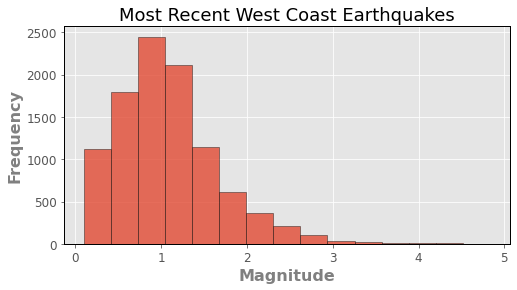

My going in hypothesis was that the distribution would be Exponential, but looks Lognormal


In [177]:
# Histogram of Earthquake Magnitude
fig = plt.figure(figsize=(8,4))

plt.hist(df['mag'], bins='sturges', edgecolor='k', density=False, alpha=.8, label='mag')
plt.title('Most Recent West Coast Earthquakes', fontsize=18)

plt.xlabel('Magnitude', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Frequency', fontsize =16, fontweight='bold', color='gray')
plt.show()
print("My going in hypothesis was that the distribution would be Exponential, but looks Lognormal")

## Geopandas Map
Instructions for installing Geopandas on a mac (shell):   https://www.geeksforgeeks.org/how-to-install-geopandas-on-macos/  
Basic mapping with geopandas: https://geopandas.org/en/stable/docs/user_guide/mapping.html

### Import Shapefiles

In [132]:
# Read shapefile to geopandas geodataframe
import geopandas
states = geopandas.read_file("/Users/davidadvocate/Documents/Python/Data/Shapefiles/states_shapefile.shp")
faults = geopandas.read_file("/Users/davidadvocate/Documents/Python/Data/Shapefiles/Qfaults_US_Database.shp")

In [154]:
my_stats(faults.fault_leng)

Descriptive Statistics
mean:     152.2822
median:   48.0000
mode:     6.3500
sem:      1.0101
min:      0.0000
max:      6,350.0000
stdev:    339.2478
skew:     5.8229
kurt:     57.1839
p05:      0.0000
p95:      1,082.0000
count:    90,859.0000


### Filter Faults

In [173]:
# Filter fault data
flt_filt = faults[faults.fault_leng > 0]
my_stats(flt_filt['fault_leng'])

Descriptive Statistics
mean:     189.0710
median:   68.0000
mode:     20.0470
sem:      1.2232
min:      1.0000
max:      6,350.0000
stdev:    368.6963
skew:     5.3486
kurt:     48.3594
p05:      13.0000
p95:      1,082.0000
count:    90,859.0000


In [170]:
# prints the geodataframe file that was a shapefile
#states
#faults

### Convert Dataframe to Geodataframe

In [60]:
# Convert dataframe to geodataframe
# Can just plot the points from the dataframe
eq = geopandas.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

In [198]:
# Basic Sataitics for the geodataframe
min=eq['mag'].min()
max=eq['mag'].max()
cnt=eq['mag'].count()
print('Minimum Earthquake Magnitude= ', min)
print('Maximum Earthquake Magnitude= ', max)
print('Count of Earthquake Magnitude=', cnt)
print('Min Date=', df['date'].min())
print('Max Date=', df['date'].max())
print('Days=    ', df['date'].max()-df['date'].min())

Minimum Earthquake Magnitude=  0.1
Maximum Earthquake Magnitude=  4.83
Count of Earthquake Magnitude= 10000
Min Date= 2023-09-24 00:00:00
Max Date= 2023-12-23 00:00:00
Days=     90 days 00:00:00


### Create a colorbar

In [164]:
# create the colorbar
import matplotlib.colors as colors
pallette='seismic_r'
#pallette='Spectral_r'
#norm = colors.Normalize(vmin=eq.mag.min(), vmax=eq.mag.max())
norm = colors.Normalize(vmin=min, vmax=max)
cbar = plt.cm.ScalarMappable(norm=norm, cmap=pallette)
print(norm)

### Plot a Geopanda's Map

/var/folders/14/gy7rs80n3fsdn2n5r1dvyvn80000gn/T/ipykernel_16464/1512858824.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax_cbar = fig.colorbar(cbar, ax=ax) # this line of code causes a warning, but works


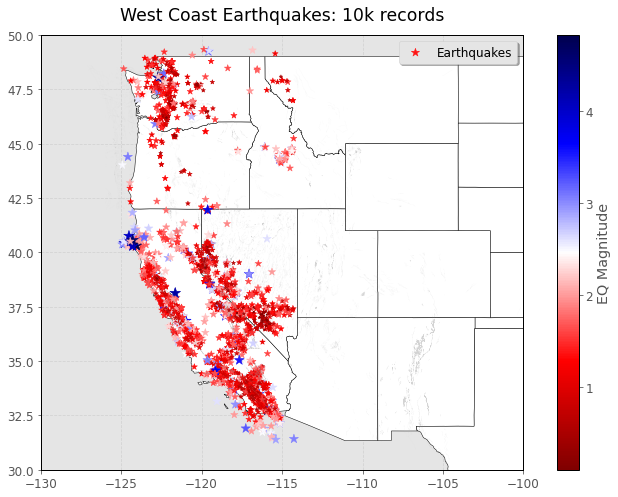

In [175]:
# Plot Geopanda's map
# Order is important
fig, ax = plt.subplots(figsize=(12, 8))
base=states.plot(ax=ax, edgecolor='k', color='white')
ax.scatter(df['longitude'], df['latitude'], marker='*',s=df['mag']*30, c=df['mag'], cmap=pallette, label='Earthquakes')
flts=flt_filt.plot(ax=ax, lw=.05, color='lightgray', alpha=.8)

# Old Code
#eq.plot(ax=ax,marker='+', color='red', markersize=eq.mag*25, label='Earthquakes')
#eq.plot(ax=ax, marker='*', c=eq.mag, cmap=pallette, legend=True, markersize=eq.mag*40, label='Earthquakes')


ax.set_xlim(-130, -100) # Western USA
ax.set_ylim(30, 50)     # Calif-Oregon-Washington  
#ax.set_ylim(30, 42.5)  # California Only
plt.legend(shadow=True)
plt.grid(linestyle='--', color='lightgray')

plt.title('West Coast Earthquakes: 10k records', y=1.02)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax) # this line of code causes a warning, but works
ax_cbar.set_label('EQ Magnitude')

plt.show()


## Test symbol Size and Color bar

Symbol size and color bar work for the scatter plot


/var/folders/14/gy7rs80n3fsdn2n5r1dvyvn80000gn/T/ipykernel_16464/2409384998.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc)


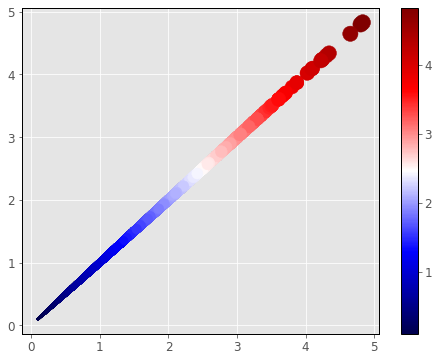

In [112]:
# Check on symbol size and colormap
print("Symbol size and color bar work for the scatter plot")
sc=plt.scatter(eq.mag, eq.mag, c=eq.mag, s=eq.mag*50, vmin=min, vmax=max, cmap=pallette)

plt.colorbar(sc)
plt.show()